# Form data analysis

In this file I want to analyze the data, that will be used for testing and training and make a general overview of what the model deals with.

The data was prepared using the original code of the authors. 

For training the following data files are used:
- xTr{fold_n} -> training features for the current fold;
- yTr{fold_n} -> training labels for the current fold;
- drugTr{fold_n} -> training drug indices for the current fold;
- edge_index -> graph edge list.

And for testing these files are used:
- xTe{fold_n} -> test features for the current fold;
- yTe{fold_n} -> test labels for the current fold;
- drugTe{fold_n} -> test drug indices for the current fold;
- edge_index -> graph edge list.

Note: in this file I will be looking at the drugcomb dataset (particularly the fifth fold).

### First, let's see how the data was split into five folds.

In [1]:
import numpy as np
import pandas as pd

data_dir = 'data-oneil/form_data/'
num_folds = 5

split_shapes = []
for fold in range(1, num_folds + 1):
    x_shape = np.load(f"{data_dir}x_split{fold}.npy").shape
    y_shape = np.load(f"{data_dir}y_split{fold}.npy").shape
    drug_shape = np.load(f"{data_dir}drug_split{fold}.npy").shape
    split_shapes.append({
        'Fold': fold,
        'x_split': x_shape,
        'y_split': y_shape,
        'drug_split': drug_shape
    })

df = pd.DataFrame(split_shapes)
print(df)

   Fold      x_split   y_split drug_split
0     1  (294, 8108)  (294, 1)   (294, 2)
1     2  (294, 8108)  (294, 1)   (294, 2)
2     3  (294, 8108)  (294, 1)   (294, 2)
3     4  (294, 8108)  (294, 1)   (294, 2)
4     5  (294, 8108)  (294, 1)   (294, 2)


This shows that each fold contains the same number of samples, which is already great.

For `x_split`:
- 5556 samples in the fold represent 5556 drug pairs (drug A, drug B) tested on a cell line.
- 9556 columns represent the features for each sample. These features include, for every gene:
    - Whether it is a target for drug A
    - Whether it is a target for drug B
    - Its gene expression value
    - Its copy number variation (CNV)
    (i.e., 4 features per gene × number of genes)

For `y_split`:
- 5556 samples in the fold represent again the 5556 drug pairs.
- Each value in `y_split` is the label that the model is trained to predict for each sample in `x_split`.

For `drug_split`:
- 5556 drug pairs again.
- Each row contains two indices, corresponding to the two drugs that form the pair for that sample (this is for mapping each sample to its specific drug combination).

### Now, let's analyze the folds for training and testing.

In [3]:
import matplotlib.pyplot as plt

data_dir = 'data-oneil/form_data/'

# Load training data for fold 5
xTr = np.load(f"{data_dir}xTr5.npy")
yTr = np.load(f"{data_dir}yTr5.npy")
drugTr = np.load(f"{data_dir}drugTr5.npy")

# Load testing data for fold 5
xTe = np.load(f"{data_dir}xTe5.npy")
yTe = np.load(f"{data_dir}yTe5.npy")
drugTe = np.load(f"{data_dir}drugTe5.npy")

# Print shapes
print("Train shapes:", xTr.shape, yTr.shape, drugTr.shape)
print("Test shapes:", xTe.shape, yTe.shape, drugTe.shape)

Train shapes: (1176, 8108) (1176, 1) (1176, 2)
Test shapes: (294, 8108) (294, 1) (294, 2)


This confirms the correct split into train and test data, since the shapes are the same, and the number of rows in the `train` equals to the sum of 4 splits, whereas the number of rows in the `test` equals to the fifth split.

### Adjacency matrix

Shape: (2027, 2027)
Number of nodes: 2027
Number of edges (non-zeros): 36454
Density: 0.008872330105003275


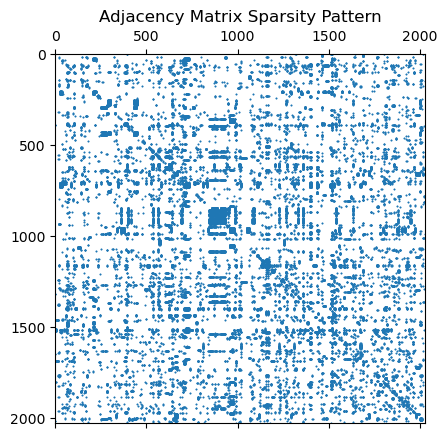

In [4]:
from scipy import sparse

# Load the sparse adjacency matrix
adj_sparse = sparse.load_npz('data-oneil/form_data/adj_sparse.npz')

# Basic info
print("Shape:", adj_sparse.shape)
print("Number of nodes:", adj_sparse.shape[0])
print("Number of edges (non-zeros):", adj_sparse.nnz)
print("Density:", adj_sparse.nnz / (adj_sparse.shape[0] ** 2))

# Optionally, visualize the sparsity pattern
import matplotlib.pyplot as plt
plt.spy(adj_sparse, markersize=0.5)
plt.title("Adjacency Matrix Sparsity Pattern")
plt.show()

This result tells us that our graph has 2389 nodes which represent genes and drugs.
There are 39,096 nonzero entries -> edges. Each edge represents a known interaction (gene-gene or drug-gene).
The plot shows the overall distribution of edges. The scattered pattern indicates that interactions are not uniformly distributed: some nodes (genes/drugs) are more connected, while many have few connections.